In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GetTridiagMatrix(x, N):
    U = lambda x: x ** 2 / 2
    h = x[1] - x[0]
    a = np.array([-1. / (2 * h ** 2)] * N)
    c = np.copy(a)
    a[0] = 0
    c[N - 1] = 0
    b = 1. / h ** 2 + U(x)
    return a, b, c


def SolveTridiagMatrix(a, b, c, d, N):
    y = np.array([0.] * N)

    for j in range(1, N):
        xi = a[j] / b[j - 1]
        b[j] -= xi * c[j - 1]
        d[j] -= xi * d[j - 1]

    y[N - 1] = d[N - 1] / b[N - 1]

    for i in range(N - 2, -1, -1):
        y[i] = 1 / b[i] * (d[i] - c[i] * y[i + 1])

    return y

In [3]:
def InverseIterations(psi_initial, x, N):
    def normalize(psi, h=x[1] - x[0]):
        return np.sqrt(np.sum(psi[:-1] ** 2 + psi[1:] ** 2) * h / 2)

    a, b, c = GetTridiagMatrix(x, N)
    current_psi = psi_initial.copy()
    E0 = 0
    iterations = 0
    while True:
        iterations += 1
        previous_psi = current_psi / normalize(current_psi)
        current_psi = SolveTridiagMatrix(np.copy(a), np.copy(b), np.copy(c), np.copy(previous_psi), N)
        energyLevel = normalize(previous_psi) / normalize(current_psi)
        if np.abs((E0 - energyLevel) / energyLevel) < 1e-11 or iterations > 100:
            break
        E0 = energyLevel
    print(f'Number of iterations = {iterations}')
    current_psi /= normalize(current_psi)

    return energyLevel, current_psi

Number of iterations = 11
E0 = 0.49998747464901816


<Figure size 1050x750 with 0 Axes>

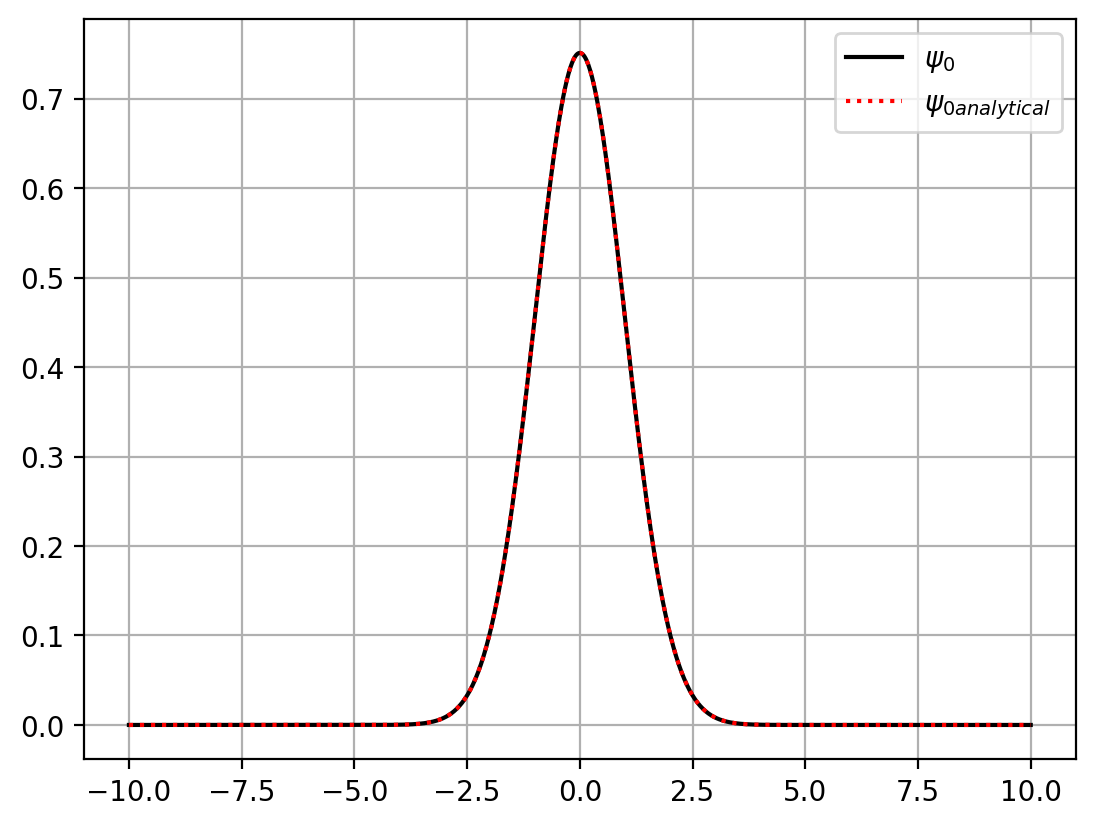

In [9]:
N = 1000
x = np.linspace(-10, 10, N)
psi_initial = np.random.RandomState(2).random_sample(x.shape)

E, psi = InverseIterations(psi_initial, x, N)

plt.figure(figsize=(7, 5), dpi=150)

print(f'E0 = {E}')
plt.figure(dpi=200)
plt.plot(x, psi, label=r'$\psi_0$', c='k')
plt.plot(x, np.exp(- x ** 2 / 2) / (np.pi ** (1 / 4)), ':', label=r'$\psi_{0analytical}$', c='r')
plt.grid()
plt.legend()
plt.show()